# Running Canonical Monte Carlo Sampling

In [1]:
import numpy as np
import json
from pymatgen.core.structure import Structure
from smol.io import load_work, save_work
import os

### 0) Load the previous LNO CE with electrostatics

In [10]:
#work_path = '/Users/myless/Packages/structure_maker/Expansions/un_fixed_vcrtizrw_fin_work.mson'
#work_path = '/Users/myless/Packages/structure_maker/Expansions/single_prim_altered_struc_vcrtizrw_fin_work.mson'
#work_path = '/Users/myless/Packages/structure_maker/Expansions/VCrTiWZr'
#expansion_path = 'Zr0_109-Ti0_062-V0_611-Cr0_109-W0_109_fin_work.mson'
expansion_path = '../Expansions/VCrTiWZr_Test/Zr0_109-Ti0_062-V0_611-Cr0_109-W0_109_fin_work.mson'
#expansion_path = '../Expansions/VCrTiWZr/Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_fin_work.mson'
#total_path = os.path.join(work_path,expansion_path)
work = load_work(expansion_path)
expansion = work['ClusterExpansion']

In [20]:
# create cluster expansion from scratch using modules 
import sys 
sys.path.append('../Modules')
from cluster_creator import prim_entry_dataloader, cluster_subspace_creator, structure_wrangler_creator 
from eci_fitter import eci_fitter
from structure_generation import create_cca_primitive, closest_composition


### Debug

In [13]:
# create cluster expansion from scratch using modules for each composition 
from monty.serialization import loadfn, dumpfn

compositions = json.load(open('compositions.json','r'))
entries = loadfn('../Entries/vcrtiwzr_entries.json')
a = 3.01
cutoffs={2 : 5, 3 : 4.1, 4 : 3.5}


comp = compositions[0]
print(comp)

# Create a list of formatted strings
formatted_items = [f'{k}{str(v).replace(".", "_")}' for k, v in comp.items()]

# Join the strings with '-'
expansion_path = '-'.join(formatted_items) + '_fin_work.mson'
work_path = '../Expansions/VCrTiWZr'

#expansion_path = comp + '_fin_work.mson'
total_path = os.path.join(work_path,expansion_path)

# create the prim structure based off composition 
prim = create_cca_primitive(comp,3.01)

print(prim)

# define subspace and wrangler
subspace = cluster_subspace_creator(prim=prim, cutoffs=cutoffs, verbose=True)
wrangler = structure_wrangler_creator(subspace=subspace, entries=entries,ncpu=-1,verbose=True)

# fit the expansion
expansion = eci_fitter(wrangler,subspace)

# save the expansion
#save_work(total_path, wrangler, expansion)

{'Cr': 0.0675, 'Ti': 0.0123, 'Zr': 0.021, 'W': 0.0301, 'V': 0.8691}
Full Formula (Zr0.021 Ti0.0123 V0.8691 Cr0.0675 W0.0301)
Reduced Formula: Zr0.021Ti0.0123V0.8691Cr0.0675W0.0301
abc   :   2.606736   2.606736   2.606736
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP                                                a    b    c
---  ----------------------------------------------  ---  ---  ---
  0  Zr:0.021, Ti:0.012, V:0.869, Cr:0.068, W:0.030    0    0    0
Basis/Orthogonal/Orthonormal : sinusoid/True/False
       Unit Cell Composition : Cr0.0675 Ti0.0123 Zr0.021 W0.0301 V0.8691
            Number of Orbits : 8
No. of Correlation Functions : 140
             Cluster Cutoffs : 2: 4.99, 3: 3.01, 4: 3.01
              External Terms : []
Orbit Summary
 ------------------------------------------------------------------------
 |  ID     Degree    Cluster Diameter    Multiplicity    No. Functions  |
 |   0       0             NA            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  1.0min finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 0.804193700532345 meV/prim
MAX 3.3335572802730695 meV/prim
The predicted energy for a structure with composition Zr2 Ti3 V53 Cr4 W2 is -9.017467975616455 eV/prim.

The fitted coefficients are:
[-2.47991227e+09  8.19653892e+09 -1.70608209e+09  4.96825254e+09
  4.04296969e+09 -4.81435623e+09  5.26185930e+09 -3.47110669e+09
 -7.02329113e+09 -1.13682316e+09  4.76755671e+09 -7.44360752e+08
  2.62099396e+09 -2.94686085e+09 -1.97261245e+09 -4.66974307e+09
  2.58098080e+09 -8.20318732e+09 -1.79467190e+09 -7.04964133e+08
 -3.49464016e+08 -1.38656387e+09 -5.00524432e+09 -1.76518653e+09
 -2.07743913e+09 -2.67876625e-01 -2.01669693e-01 -2.68710613e-01
 -2.12259293e-02 -2.35300064e-02 -1.69133186e-01 -4.91952896e-03
 -6.30607605e-02 -1.16758108e-01 -3.54137421e-02 -3.53223562e-01
 -3.65849733e-01 -8.05189610e-02  8.13193321e-02 -7.74912834e-02
 -1.95816040e-01  1.71894133e-02  1.47696733e-01 -2.06921101e-02
 -1.58083439e-02  2.25974846e+08 -1.40013244e+10  

### mass generate Cluster Expansion

In [21]:
# create cluster expansion from scratch using modules for each composition 
from monty.serialization import loadfn, dumpfn

compositions = json.load(open('compositions.json','r'))
entries = loadfn('../Entries/vcrtiwzr_entries.json')
a = 3.01
#cutoffs={2 : 5, 3 : 4.1, 4 : 3.5}
cutoffs = {2 : 5, 3 : 4.1}

for comp in compositions:
    print(comp)

    # Create a list of formatted strings
    formatted_items = [f'{k}{str(v).replace(".", "_")}' for k, v in comp.items()]

    # Join the strings with '-'
    expansion_path = '-'.join(formatted_items) + '_fin_work.mson'
    work_path = '../Expansions/VCrTiWZr'

    #expansion_path = comp + '_fin_work.mson'
    total_path = os.path.join(work_path,expansion_path)

    # create the prim structure based off composition 
    prim = create_cca_primitive(comp,3.01)

    print(prim)

    # define subspace and wrangler
    subspace = cluster_subspace_creator(prim=prim, cutoffs=cutoffs, verbose=True)
    wrangler = structure_wrangler_creator(subspace=subspace, entries=entries,ncpu=-1,verbose=True)

    # fit the expansion
    expansion = eci_fitter(wrangler,subspace)

    # save the expansion
    save_work(total_path, wrangler, expansion)

{'Cr': 0.0675, 'Ti': 0.0123, 'Zr': 0.021, 'W': 0.0301, 'V': 0.8691}
Full Formula (Zr0.021 Ti0.0123 V0.8691 Cr0.0675 W0.0301)
Reduced Formula: Zr0.021Ti0.0123V0.8691Cr0.0675W0.0301
abc   :   2.606736   2.606736   2.606736
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (1)
  #  SP                                                a    b    c
---  ----------------------------------------------  ---  ---  ---
  0  Zr:0.021, Ti:0.012, V:0.869, Cr:0.068, W:0.030    0    0    0
Basis/Orthogonal/Orthonormal : sinusoid/True/False
       Unit Cell Composition : Cr0.0675 Ti0.0123 Zr0.021 W0.0301 V0.8691
            Number of Orbits : 7
No. of Correlation Functions : 85
             Cluster Cutoffs : 2: 4.99, 3: 3.01
              External Terms : []
Orbit Summary
 ------------------------------------------------------------------------
 |  ID     Degree    Cluster Diameter    Multiplicity    No. Functions  |
 |   0       0             NA                 0    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  1.1min finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti1 V56 Cr4 W2 is -9.079175490898937 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   55.9s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr2 Ti6 V48 Cr4 W4 is -9.082146014366906 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.5

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   55.4s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr3 Ti4 V54 Cr2 W1 is -8.88661848931655 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.59

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   58.6s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr3 Ti4 V47 Cr5 W5 is -9.181887234018 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.5927

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   54.5s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr2 Ti2 V55 Cr1 W4 is -9.135234420701053 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.5

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   53.8s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti1 V55 Cr3 W4 is -9.196808996019168 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   56.1s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr1 Ti3 V53 Cr6 W1 is -8.99251880161014 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.59

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   56.1s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr2 Ti6 V50 Cr2 W4 is -9.05655108843344 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.59

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   56.2s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti2 V52 Cr3 W6 is -9.302466940049447 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   53.7s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr2 Ti2 V55 Cr1 W4 is -9.134428218024963 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   53.2s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr2 Ti2 V51 Cr6 W3 is -9.1182168762472 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   52.6s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr2 Ti3 V53 Cr4 W2 is -9.018220782388767 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   54.2s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim


/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The predicted energy for a structure with composition Zr2 Ti2 V51 Cr6 W3 is -9.11579050154002 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2.50222889e-01
 -1.56432672e-01  4.71678735e-02 -1.49751297e-01  5.90045796e-02
  2.08650433e-01 -9.59

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   51.5s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr2 Ti3 V53 Cr4 W2 is -9.013020001768506 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   51.0s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti1 V56 Cr4 W2 is -9.07683174745596 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   51.1s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti2 V52 Cr3 W6 is -9.302466940049447 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   51.4s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr3 Ti5 V50 Cr5 W1 is -8.901003219197907 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   51.0s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr3 Ti4 V48 Cr5 W4 is -9.12021742444858 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   50.8s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr1 Ti5 V51 Cr5 W2 is -9.004367423930653 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   50.2s finished
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 4 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66880864
Index 32 - Zr3 Ti4 V54 Cr2 W1 energy=-569.66908674
 Consider adding more terms to the clustersubspace or filtering duplicates.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/smol/lib/python3.10/site-packages/smol/cofe/wrangling/wrangler.py:808: UserWarning: The following structures have duplicated correlation vectors:
 Index 25 - Zr3 Ti4 V47 Cr5 W5 energy=-587.31883282
Index 37 - Zr3 Ti4 V47 Cr5 W5 energy=-587.3188017
 Consider adding more terms to the clustersubspace or


Total structures that match 230/230
RMSE 1.0326555446395418 meV/prim
MAX 4.146416625021132 meV/prim
The predicted energy for a structure with composition Zr2 Ti6 V48 Cr4 W4 is -9.074754356214541 eV/prim.

The fitted coefficients are:
[-9.52002651e+00  4.99324755e-01 -1.83923619e+00 -6.74951091e-01
 -1.01236083e+00 -2.36171015e-01 -7.04154702e-02 -4.26142019e-01
  1.39748817e-02  5.67991949e-02 -8.44686516e-02  8.48772565e-03
 -1.93427359e-01 -1.31248357e-01 -4.57780111e-03 -4.19359312e-01
 -1.04079801e-01 -5.82565500e-01  1.92889434e-01 -4.42777872e-02
  5.43174012e-02  4.37287517e-02 -1.76436752e-01  8.85454544e-02
 -4.05302577e-02 -2.98368138e-01 -2.04486622e-01 -3.32278819e-01
 -3.53433740e-02 -2.31942313e-02 -1.35793044e-01 -1.01907378e-02
 -6.67827256e-02 -6.80410915e-02 -2.22503142e-02 -3.45922067e-01
 -4.33204161e-01 -1.83321272e-01  3.71663251e-02 -7.41846687e-02
 -1.87922065e-01  3.45823805e-02  6.80587127e-02 -2.28413063e-02
 -1.26824383e-02  1.05013644e-01 -1.77915008e-01  

### 1) Create a canonical ensemble
The `Ensemble` class can be used to run MC in a fixed composition ensemble.
The ensemble classes will determine the **active** sublattices by grouping all sites that have the same possible partial occupancies.

To run for fixed chemical potential see the notebook on semigrand ensemble MC.

In [11]:
from smol.moca import Ensemble

# Create the ensemble
# This specifies the size of the MC simulation domain.
# this gives a 64 site unit cell
sc_matrix = np.array([
    [4, 0, 0],
    [0, 4, 0],
    [0, 0, 4]
])
"""
# 64 atom unit cell?
sc_matrix = np.array([
    [4, 1, 3],
    [2, 4, 1],
    [3, 2, 4]
])
"""

# this convenience method will take care of creating the appropriate
# processor for the given cluster expansion.
#os.environ['OMP_NUM_THREADS'] = '4'
ensemble = Ensemble.from_cluster_expansion(expansion, sc_matrix)

# In a real scenario you may want a much larger processor.size
# An MC step is O(1) with the processor.size, meaning it runs at
# the same speed regardless of the size. However, larger sizes
# will need many more steps to reach equilibrium in an MC simulation.
print(f'The supercell size for the processor is {ensemble.processor.size} prims.')
print(f'The ensemble has a total of {ensemble.num_sites} sites.')
print(f'The active sublattices are:')
for sublattice in ensemble.sublattices:
    print(sublattice)

The supercell size for the processor is 64 prims.
The ensemble has a total of 64 sites.
The active sublattices are:
Sublattice(site_space=Zr0.109 Ti0.062 V0.611 Cr0.109 W0.109 , sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), active_sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), encoding=array([0, 1, 2, 3, 4]))


### 3) Create an MC sampler
A `Sampler` will take care of running MC sampling runs for a given ensemble. The sampler allows many different options for MC sampling most importantly setting the MCMC algorithm and the type of MC steps taken. However the defaults are usually enough for almost all use cases.

In [12]:
from smol.moca import Sampler

# This will take care of setting the defaults
# for the supplied canonical ensemble
# here we also set the temperature to our operating temperature, in V-Cr-Ti this should be around 900K 
T_sample = 973.15
sampler = Sampler.from_ensemble(ensemble, temperature=T_sample)
print(f"Sampling information: {sampler.samples.metadata}")

Sampling information: Metadata(cls_name='SampleContainer', kernels=[Metadata(seed=203295361477952625506701192683388302095, step=Metadata(sublattices=[(Element Zr, Element Ti, Element V, Element Cr, Element W)], sublattice_probabilities=array([1.]), cls_name='Swap'), cls_name='Metropolis')])


In [13]:
compositions = [sublattice.composition for sublattice in ensemble.sublattices]
print(compositions)


[Composition('Zr0.109 Ti0.062 V0.611 Cr0.109 W0.109')]


### 3) Create an initial structure and get occupancies
You will need to create an initial test structure to obtain an initial occupancy to start an MC run. There are many ways to do this, you could simply rescale a training structure and use that. But since the composition is fixed in a canonical ensemble you need to make sure you input the right composition. It can also be helpful to run a simulated anneal step to get a good initial structure rather than starting with a low energy one.

Here we will use the underlying processor to generate a random occupancy at the composition of the disordered structure used in the original cluster expansion

In [14]:
from smol.capp.generate import generate_random_ordered_occupancy

print(dir(sublattice))
compositions = [sublattice.composition for sublattice in ensemble.sublattices]
init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                              composition=compositions,
                                              tol = 0.5,
                                              rng=42)

print(f"The disordered structure has composition: {ensemble.processor.structure.composition}")
print(f"The initial occupancy has composition: {ensemble.processor.structure_from_occupancy(init_occu).composition}")

['REDIRECT', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__get_validators__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__modify_schema__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_generic_json_schema', '_ipython_display_', '_repr_mimebundle_', '_validate_monty', 'active_sites', 'as_dict', 'composition', 'display_json', 'encoding', 'from_dict', 'is_active', 'reset_restricted_sites', 'restrict_sites', 'restricted_sites', 'site_space', 'sites', 'species', 'split_by_species', 'to_json', 'to_plotly_json', 'unsafe_hash', 'validate_monty_v1', 'validate_monty_v2']
The disordered structure has composition: Zr6.976

In [26]:
print(init_occu)

[2 2 0 2 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2]


In [15]:
# The occupancy strings created by the processor
# are by default "encoded" by the indices of the species
# for each given site. You can always see the actual
# species in the occupancy string by decoding it.
print(f'The encoded occupancy is:\n{init_occu}')
print(f'The initial occupancy is:\n {ensemble.processor.decode_occupancy(init_occu)}')

The encoded occupancy is:
[3 2 2 2 3 0 2 3 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 3 2 0 2 2 2 2 1 2 4 2 4 3
 2 3 0 2 2 1 2 1 0 2 2 1 3 4 2 2 2 0 4 2 4 2 2 2 0 2 0]
The initial occupancy is:
 [Element Cr, Element V, Element V, Element V, Element Cr, Element Zr, Element V, Element Cr, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element V, Element W, Element W, Element V, Element V, Element Cr, Element V, Element Zr, Element V, Element V, Element V, Element V, Element Ti, Element V, Element W, Element V, Element W, Element Cr, Element V, Element Cr, Element Zr, Element V, Element V, Element Ti, Element V, Element Ti, Element Zr, Element V, Element V, Element Ti, Element Cr, Element W, Element V, Element V, Element V, Element Zr, Element W, Element V, Element W, Element V, Element V, Element V, Element Zr, Element V, Element Zr]


### 4) Run MC iterations
MC iterations are by default run by swapping sites from all active sublattices, but fine grained simulations can also be ran by only flipping on some of the active sublattices or even freezen specific sites in active sublattices. MC samples are saved in a `SampleContainer` created or given to the `Sampler` when created.

In [9]:
occu = np.zeros(ensemble.num_sites,dtype=int)
ensemble.processor.num_threads_full = 1
%timeit ensemble.compute_feature_vector(occu)

279 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


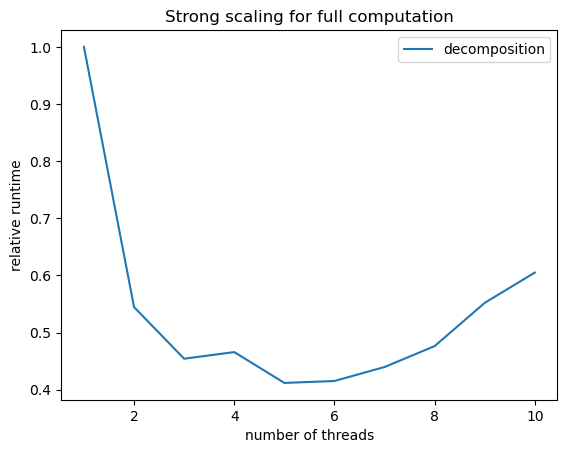

In [10]:
# plot the scaling of performance gains
import os
from time import perf_counter

thread_range = range(1, os.cpu_count() + 1)
run_time_cd = []
for num_threads in thread_range:
    run_time_cd.append(0)
    ensemble.processor.num_threads_full = num_threads
    #ensemble_ce.processor.num_threads_full = num_threads
    for _ in range(1000):
        start = perf_counter()
        ensemble.compute_feature_vector(occu)
        run_time_cd[-1] += perf_counter() - start

        #start = perf_counter()
        #ensemble_ce.compute_feature_vector(occu)
        #run_time_ce[-1] += perf_counter() - start

run_time_cd = np.array(run_time_cd)

import matplotlib.pyplot as plt
plt.plot(thread_range, run_time_cd/run_time_cd[0], label='CD')
plt.title("Strong scaling for full computation")
plt.ylabel("relative runtime")
plt.xlabel("number of threads")
plt.legend(["decomposition", "expansion"])
plt.show()

In [16]:
# run 1M iterations
# since this is the first run, the initial occupancy must be supplied
sampler.run(
    1000000,
    initial_occupancies=init_occu,
    thin_by=100, # thin_by will save every 100th sample only
    progress=True
) # progress will show progress bar

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:50<00:00, 19748.76it/s]


In [17]:
# print the number of being threads used
print(f"The cluster_subspace is set to use {ensemble.processor.cluster_subspace.num_threads} openmp threads for full computations.")
print(f"The processor is set to use {ensemble.processor.num_threads_full} openmp threads for full computations.")
print(f"The processor is set to use {ensemble.processor.num_threads} openmp threads to compute local changes.")

The cluster_subspace is set to use 2 openmp threads for full computations.
The processor is set to use 2 openmp threads for full computations.
The processor is set to use 2 openmp threads to compute local changes.


In [18]:
# Samples are saved in a sample container
samples = sampler.samples

print(f'Fraction of successful steps (efficiency) {sampler.efficiency()}')
print(f'The last step energy is {samples.get_energies()[-1]} eV')
print(f'The minimum energy in trajectory is {samples.get_minimum_energy()} eV')

# You can get the minimum energy structure and current structure
# by using the ensemble processor
curr_s = ensemble.processor.structure_from_occupancy(samples.get_occupancies()[-1])
min_s = ensemble.processor.structure_from_occupancy(samples.get_minimum_energy_occupancy())

Fraction of successful steps (efficiency) 0.003466
The last step energy is -598.7757244639699 eV
The minimum energy in trajectory is -599.3793946365953 eV


#### 4.1) Continuing or resetting the MC trajectory
You can always continue running more iterations from where the trajectory left off by calling `run` again.
You can also reset to the initial state. (we will skip this step for now so we can show results from the run above.

In [42]:
# You can continue the MC trajectory simmply by calling run again
# it is recommended to use the same thin_by used before
#sampler.run(10000, thin_by=100)  # this will append new data

# If you want to start from scratch
#sampler.clear_samples()  # this will delete data, and reset the ensemble to its initial state
# Now you can start a fresh run
#sampler.run(1000000,
#             initial_occupancies=init_occu,
#             thin_by=100, # thin_by will save every 100th sample only
#             progress=True) # progress will show progress bar

### 5) Check convergence of MC sampling
Find the minimum number of samples required to discard for equilibration while converging the energy

[-4.26575262e+09 -2.09771913e+10 -4.21200016e+10 ... -1.31491845e+13
 -1.31491845e+13 -1.31491845e+13]


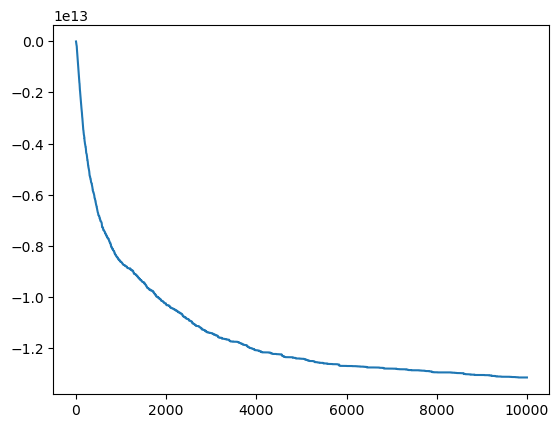

In [15]:
#from smol.moca.analysis.convergence import check_property_converged, determine_discard_number

energies = samples.get_energies()
# 100 as an initial guess for amount to discard
#opt_discard = determine_discard_number(property_array=energies, init_discard=100, verbose=True)
#converged = check_property_converged(energies[opt_discard:])
#print(f'Is the energy converged after discarding the first {opt_discard} samples?', converged)
print(energies)

# let's plot the energy trajectories over time 

import matplotlib.pyplot as plt
runs = np.arange(len(energies))
plt.plot(runs, energies)

### 6) Look at trajectory samples and averages
We can look at the sampled energies, the average and variance directly from the class properties.

For further analysis samples are stored as a list of dictionaries for each sampled step in the `CanonicalEnsemble.data` attribute.
In the `CanonicalEnsemble` class only the energy and occupancy string of each sample are saved.

In [16]:
# Set 100 samples for burn-in, as determined in 5)
discard = 100 # this is in terms of samples so it would be discard*thin_by steps
print(f'A total of {len(samples)} samples taken.')
print(f'A total of {len(samples.get_energies(discard=discard))} samples used for production.')
print(f'The average energy is {samples.mean_energy(discard=discard)} eV')
print(f'The energy variance is {samples.energy_variance(discard=discard)} eV^2')
print(f'The sampling efficiency (acceptance rate) is approximately {samples.sampling_efficiency(discard=discard)}')

A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -11570432830253.146 eV
The energy variance is 4.004631138671639e+24 eV^2
The sampling efficiency (acceptance rate) is approximately 8.300830083008301e-05


In [19]:
initial_structure = samples.get_sampled_structures(indices=[0])[0]

initial_composition = initial_structure.composition

# initial_composition is a pymatgen Composition object, I want to convert to string, 
print(initial_composition)

s = '../Expansions/VCrTiWZr/Cr0_0672-Ti0_0428-Zr0_0248-W0_0289-V0_8363_fin_work.mson'

# Find the start and end of the substring
start = s.find('VCrTiWZr/') + len('VCrTiWZr/')
end = s.find('_fin_work.mson')

# Extract the substring
substring = s[start:end]

print(substring)

Cr378 V3292 W132 Ti210 Zr84
Cr0_0672-Ti0_0428-Zr0_0248-W0_0289-V0_8363


In [45]:
#write these to cif files
from pymatgen.io.cif import CifWriter
structure_path = '/home/myless/Packages/structure_maker/Visualization/Structures'

initial_structure = samples.get_sampled_structures(indices=[0])[0]
print(initial_structure)

# write the initial structure to a CIF file
cif = CifWriter(initial_structure)
total_initial_path = os.path.join(structure_path, 'big_big_initial_structure.cif')
cif.write_file(total_initial_path)

# print the last structure 
final_structure = samples.get_sampled_structures(indices=[-1])[0]
print(final_structure)

# write the final structure to a CIF file
cif = CifWriter(final_structure)
total_final_path = os.path.join(structure_path, 'big_big_final_structure.cif')
cif.write_file(total_final_path)


Full Formula (Zr84 Ti210 V3292 Cr378 W132)
Reduced Formula: Zr42Ti105V1646(Cr63W22)3
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  Cr    0       0       0
   1  V     0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  V     0       0       0.25
   5  V     0       0       0.3125
   6  V     0       0       0.375
   7  W     0       0       0.4375
   8  V     0       0       0.5
   9  V     0       0       0.5625
  10  V     0       0       0.625
  11  V     0       0       0.6875
  12  V     0       0       0.75
  13  V     0       0       0.8125
  14  V     0       0       0.875
  15  V     0       0       0.9375
  16  V     0       0.0625  0
  17  V     0       0.0625  0.0625
  18  Cr    0       0.0625  0.125
  19  W     0       0.0625  0.1875
  20  V     0       0.0625  0.2

### Save your work
The `Sampler` class does and can not be saved since it does not really have any computed values. However the `SampleContainter` where the MC samples are recorded can be saved.
You can use the same `save_work` convenience function to save your work.

You can also save the `SampleContainer` as an hdf5 file. You will need `h5py` installed.